In [8]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [9]:
def standard_units(x):
    """Convert array x to standard units."""
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

# Correlation

In [10]:
galton = Table.read_table('galton.csv')
galton.show(5)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5


Let's make a table that just has the heights

<details>
<summary>Solution</summary>
  'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
</details>

In [28]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


Let's show a scatter plot where MidParent is on the x-axis

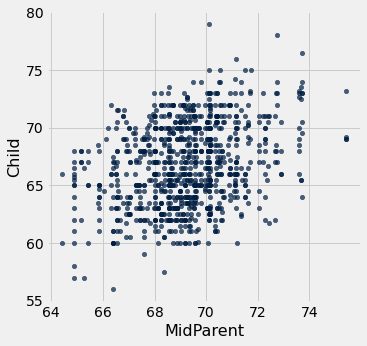

In [29]:
heights.scatter('MidParent')

Now let's predict the child's height based on the average of the parents' height

(brief discussion)

**Question:** What type of trend do we see?

<details>
<summary>Solution</summary>
  We see an association between midParent height and child height
</details>

# Correlation Coefficient

Dont worry about this function for now. Just read the doc string

In [11]:
def r_scatter(r):
    """ Draws a scatter diagram with correlation r"""
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 100)
    z = np.random.normal(0, 1, 100) #increase this number to see more points
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

Let's pass in different values to `r_scatter()` and see what we get

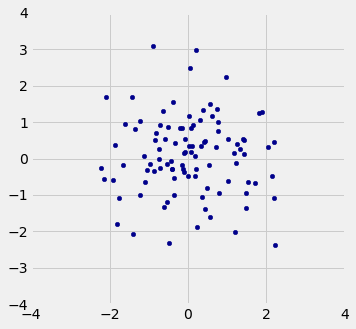

In [12]:
r_scatter(0)

In [ ]:
r_scatter(0)

# Calculating *r*

Let's look at this small example

In [13]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


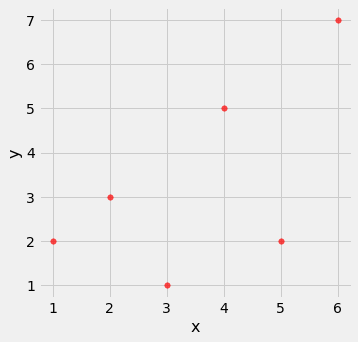

In [14]:
t.scatter('x', 'y', s=30, color='red')

**Question:** What should *r* be here?


<details>
<summary>Solution</summary>
  positive, but less than 1
</details>

Let's try finding *r*

First thing to do is convert the data into ____?


<details>
<summary>Solution</summary>
  standard units
</details>

In [15]:
# skip










x, y

(array([1, 2, 3, 4, 5, 6]), array([2, 3, 1, 5, 2, 7]))

In [17]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [18]:
np.mean(standard_units(x))

-3.700743415417188e-17

Let's make another column where each value is x (su) * y (su)

In [19]:
t = t.with_columns('product of standard units', standard_units(x) * standard_units(y))
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [20]:
# r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

0.6174163971897709

## Function to compute *r*

Let's fill in the following function
<details>
<summary>Code</summary>
  x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)
</details>


In [24]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    stand_x = standard_units(t.column(x))
    stand_y = standard_units(t.column(y))
    r = np.mean(stand_x * stand_y)
    return r

In [25]:
correlation(t, 'x', 'y')

0.6174163971897709

**Question:** How linearly correlated are the variables we considered before from the hybrid cars?

In [ ]:
# hybrids.select("msrp", "acceleration")
# acceleration, msrp
hybrids.labels

Judging correlations by eye is pretty hard, unless the correlation is -1 and 1

## Switching x and y axes

Do we think our correlations will change?

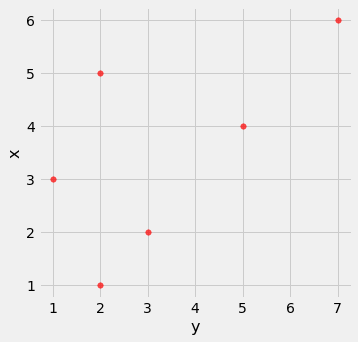

In [27]:
t.scatter('y', 'x', s=30, color='red')

In [ ]:
# lets try it

In [28]:
correlation(t, 'y', 'x')

0.6174163971897709

In [29]:
correlation(t, 'x', 'y')

0.6174163971897709

(back to slides)
## Nonlinearity

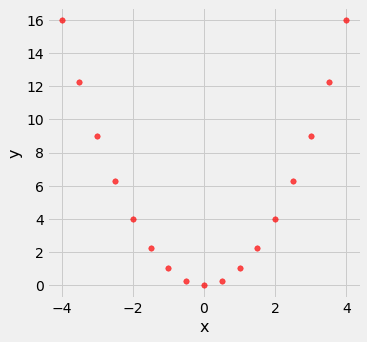

In [30]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

**Question:** are x and y here associated? 
<details>
<summary>Solution</summary>
  Yes, clearly
</details>

<br> <br>

**Question:** But what is the *r* value?

In [31]:
correlation(nonlinear, 'x', 'y')

0.0

## Outliers

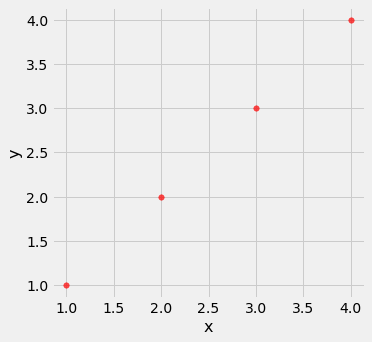

In [32]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

**Question:** What is *r* here

In [33]:
correlation(line, 'x', 'y')

1.0

Now let's look at the same example but with an outlier

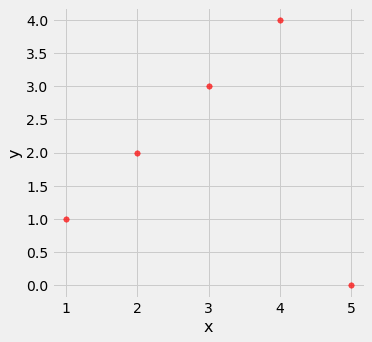

In [34]:

outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

**Question:** Are x and y here still correlated?
    
<details>
<summary>Solution</summary>
  We want to say yes, or atleast mostly
</details>

In [35]:
correlation(outlier, 'x', 'y')

0.0

**Question:** Did the outlier affect the correlation?
    
<details>
<summary>Solution</summary>
  Yes!
</details>

## Ecological Correlations

Corelations based on groups or aggregated data

In [36]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


**Question:** Is there a correlation between `Math` and `Critical Reading` scores on the SAT?

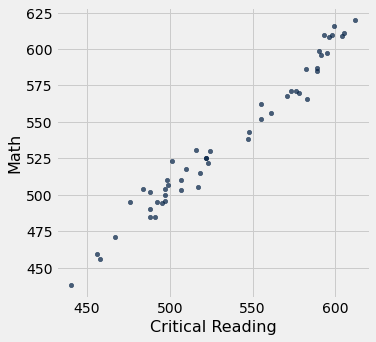

In [37]:
sat2014.scatter('Critical Reading', 'Math')

In [38]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434

If we want to predict math score from critical reading score, we think about it on an individual case.

But here, the data is on the state level. We can see that the correlation is inflated when we aggregate the data. This relationship won't be true on the individual level

**Question:** If we didn't aggregate the data, how many points would we see in the graph?

<details>
<summary>Solution</summary>
  A lot more. For every point we see in the graph, we would see blob of points where the center of a blob was one of the points in our graph
</details>

When showing a scatter plot and computing *r*, think about the individuals and the aggregate

(back to slides)
# Prediction

In [39]:
galton = Table.read_table('galton.csv')
galton.show(5)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5


In [40]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


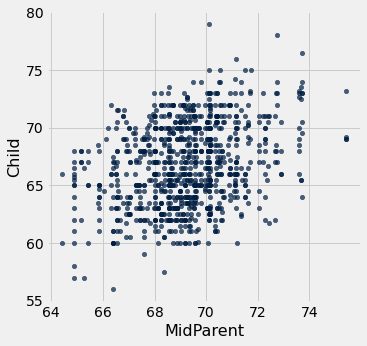

In [41]:
heights.scatter('MidParent')

**Question:** Are these two variables correlated?

**Question:** Can we quantify how linearly correlated they are?

In [42]:
correlation(heights, "MidParent", "Child")

0.32094989606395924

### Predicting child heights based on parent's midheight

In [43]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()

In [44]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

In [47]:
predict_child(75)

70.1

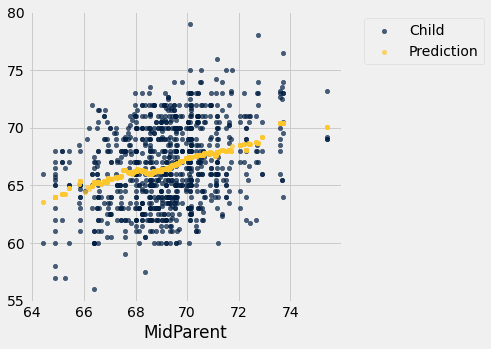

In [48]:
heights_with_predictions.scatter('MidParent')

(back to slides)
# Linear Regression

In [49]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in this class


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_table(r):
    """
    Generate a table of 1000 x,y data points in standard units
    whose correlation is approximately equal to r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

Let's look at an example where our data is linearly correlated

In [50]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


`example` is a table of 1k examples where `x` and `y` have a correlation coefficient of 0.99



**Question:** How could we visualize the correlation?

<details>
<summary>Solution</summary>
  example.scatter('x', 'y')
</details>

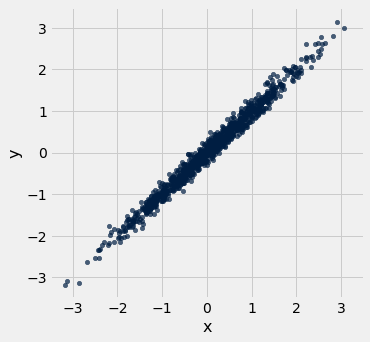

In [53]:
example.scatter('x', 'y')
resize_window()

Let's now make our predictions

In [52]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))

**Question:** What should our `y` value be when `x` is 0?

In [54]:
nn_prediction_example(0)

0.006236760779085388

**Question** What about when `x` is 2 or -2?

In [56]:
nn_prediction_example(2), nn_prediction_example(-2)

(1.9934654069813174, -1.8879128700472432)

Now let's apply the prediction function to our table

In [57]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

In [58]:
example

x,y,Predicted y
0.0912047,-0.0680119,0.104202
1.09128,1.04391,1.05235
-1.94697,-1.88316,-1.85456
-1.38635,-1.34674,-1.32041
-2.29649,-2.14933,-2.17514
2.40983,2.59627,2.41498
1.72784,1.76089,1.70671
2.20456,2.5933,2.12065
0.794828,0.778249,0.791607
0.976421,1.18139,0.947165


Let's plot the predictions (in yellow)

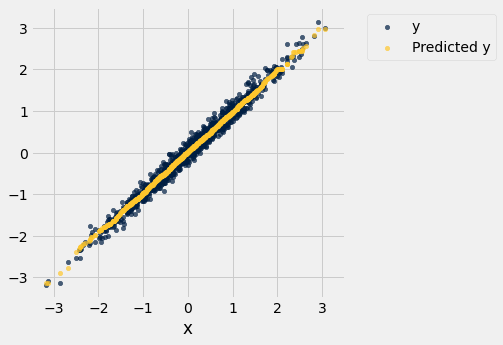

In [59]:
example.scatter('x')
resize_window()

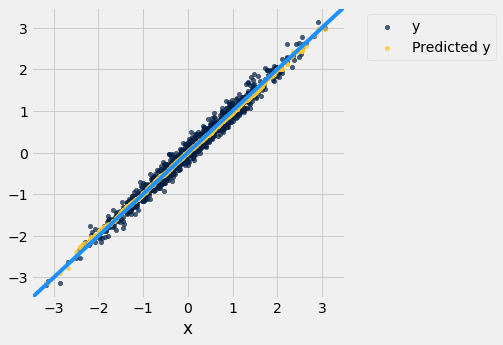

In [60]:
example.scatter('x')
draw_line(slope=1, color='dodgerblue')
resize_window()

Now let's make a new table where the data is not linearly correlated

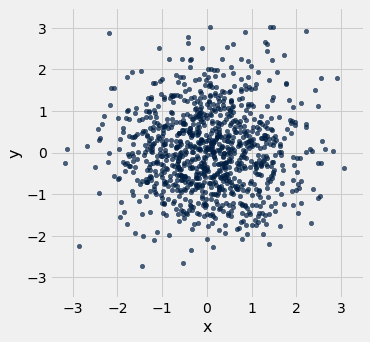

In [61]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

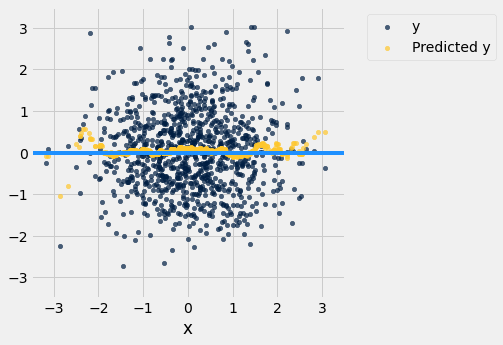

In [62]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=0, color='dodgerblue')
resize_window()

Now let's look at an example where the scatter plot is oval shaped

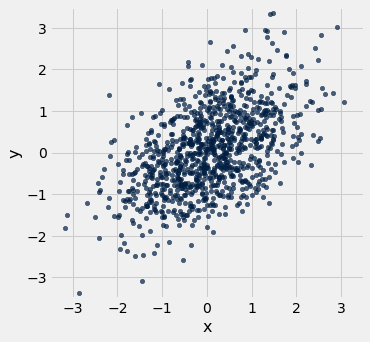

In [63]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

(back to slides)

# Linear regression: defining the line


In [65]:
# Copy-pasted from above
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

**Question:** let's compute the slope and intercept

<details>
<summary>Equation</summary>
  ![image.png](slope_intercept_eq.png)
</details>


<!-- copy the equation markdown to this cell and change the cell to markdown -->
(put equation here)

In [70]:
def slope(t, x, y):
    # r * standard_dev(y) / standard_dev(x)
    x_array = t.column(x)
    y_array = t.column(y)
    r = correlation(t, x, y)
    
    return r * np.std(y_array) / np.std(x_array)
    

def intercept(t, x, y):
    # mean(y) - slope * mean(x)
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

In [69]:
example = r_table(0.5)
slope(example, 'x', 'y')

0.5022638281625915

In [71]:
intercept(example, 'x', 'y')

0.03801479544542581

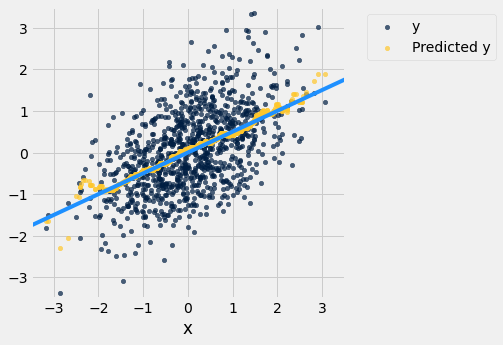

In [73]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=0.5, color='dodgerblue')
resize_window()

(back to slides)

# Root Mean Squared Error

In [25]:
little_women = Table().read_table('https://www.inferentialthinking.com/data/little_women.csv')
little_women

Characters,Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


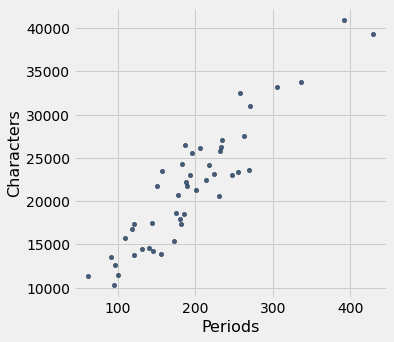

In [26]:
little_women.scatter(1,0)

**Question:** Do we think there is a linear association here?

In [27]:
correlation(little_women, 'Periods', 'Characters')

0.9229576895854816

**Question:** Let's compute the correlation

In [ ]:
correlation(little_women, 1, 0)

Now lets predict the number of characters based on the number of periods in a chapter

In [29]:
pred_characters = fitted_values(little_women, 'Periods', 'Characters') #
pred_characters 

array([21183.59679439, 21096.61895313, 24836.66612724, 21705.46384194,
       26924.13431744, 16921.68257274, 16138.88200141, 23358.04282585,
       34056.31730062, 20835.68542936, 21531.50815943, 42058.27869638,
       19965.90701678, 20400.79622307, 20487.77406433, 19704.973493  ,
       18226.35019161, 17269.59393777, 15269.10358883, 17356.57177903,
       28141.82409506, 15182.12574757, 26228.31158737, 20574.75190559,
       12659.76835108, 17791.46098532, 14225.36949373, 28315.77977757,
       25010.62180976, 23705.95419088, 20226.84054055, 24227.82123843,
       24923.6439685 , 27098.08999996, 22227.33088949, 13442.5689224 ,
       18400.30587413, 22662.22009578, 27619.95704751, 10050.43311333,
       21009.64111188, 15008.17006505, 31273.02638036, 13007.67971611,
       13094.65755737, 25097.59965102, 38840.09856983])

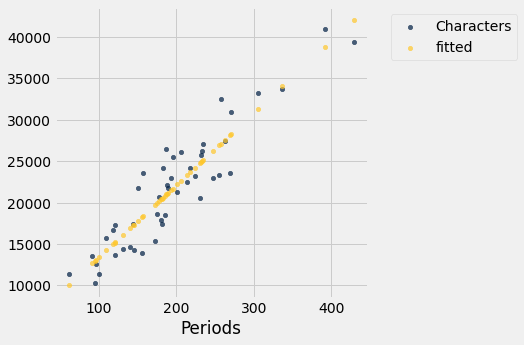

In [31]:
little_women_fitted = little_women.with_columns("fitted", pred_characters)
#little_women_fitted.hist() # What does this histogram mean? 
# Then lets uncomment the next line to look at the scatter of the predictions
little_women_fitted.scatter(1)

## Squared Error

This function will draw a line with a specified slope and intercept and will draw red lines showing the errors

In [32]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print("Slope:      ", np.round(slope), 'characters per period')
    print("Intercept:  ", np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x,y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:       50 characters per period
Intercept:   1000 characters


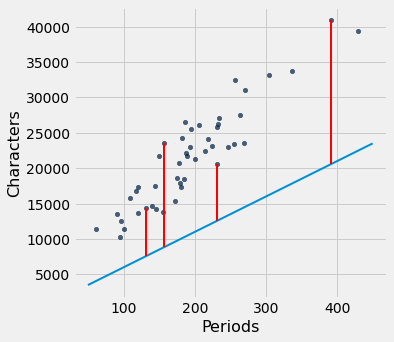

In [33]:
lw_errors(50, 1000)

Slope:       100 characters per period
Intercept:   1000 characters


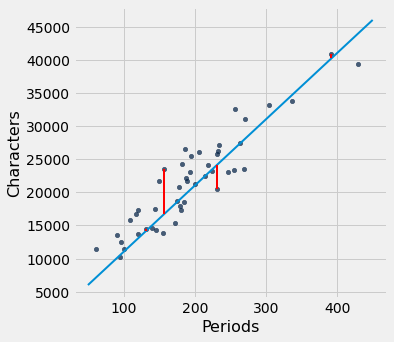

In [38]:
lw_errors(100, 1000)

Let's try it with more slopes and intercepts

In [ ]:
lw_errors(70, 1000)

Lets make a line that goes through part of the scatter diagram

Now let's compute the root mean square error for the differnt lines we just considered

In [39]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

Slope:       50 characters per period
Intercept:   1000 characters
Root mean squared error: 11608.27


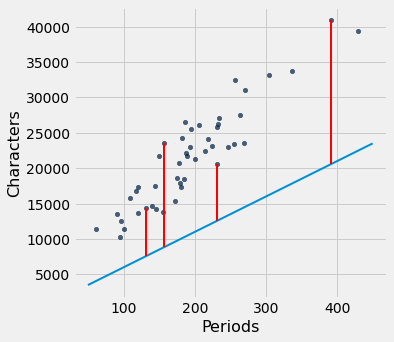

In [40]:
lw_rmse(50,1000)

Slope:       70 characters per period
Intercept:   1000 characters
Root mean squared error: 7657.15


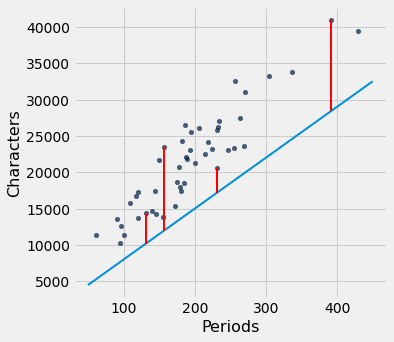

In [41]:
lw_rmse(70,1000)

Slope:       100 characters per period
Intercept:   1000 characters
Root mean squared error: 3114.33


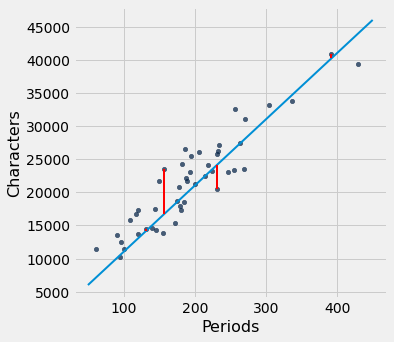

In [42]:
lw_rmse(100,1000)

Slope:       102 characters per period
Intercept:   1000 characters
Root mean squared error: 3036.57


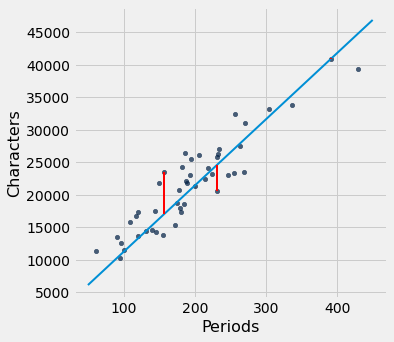

In [43]:
lw_rmse(102,1000)

Slope:       110 characters per period
Intercept:   1000 characters
Root mean squared error: 3284.41


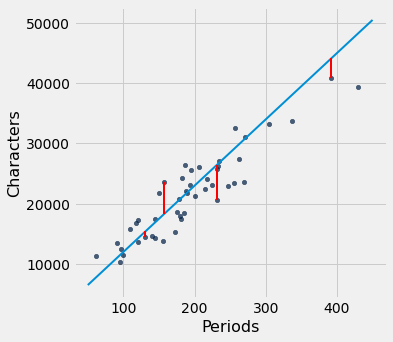

In [44]:
lw_rmse(110,1000)

Slope:       105 characters per period
Intercept:   1000 characters
Root mean squared error: 3025.85


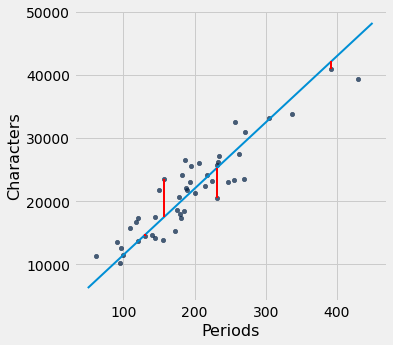

In [45]:
lw_rmse(105,1000)

Let's comput the rmse for the regression line 

<details>
<summary>Solution</summary>
  lw_rmse(slope(little_women, 1, 0), intercept(little_women, 1, 0))
</details>

In [47]:
slope(little_women, 1, 0), intercept(little_women, 1, 0)

(86.97784125829821, 4744.784796574928)

Slope:       87.0 characters per period
Intercept:   4745.0 characters
Root mean squared error: 2701.69


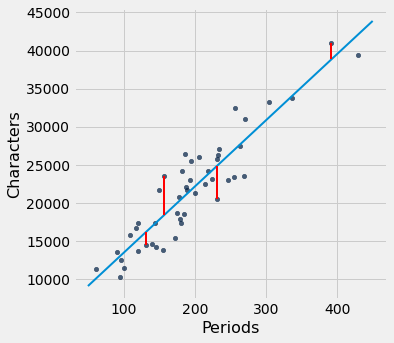

In [46]:
lw_rmse(slope(little_women, 1, 0), intercept(little_women, 1, 0))

The regression line is the line that minimzies the root mean squared error.

(back to slides)
# Least Squares

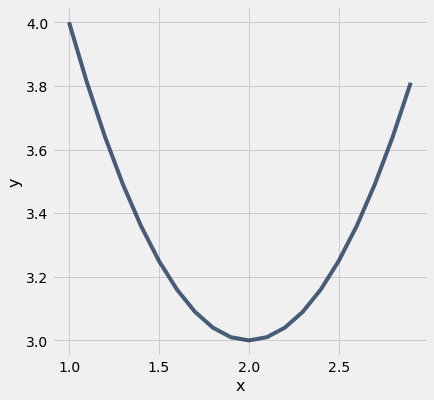

In [48]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [49]:
def f(x):
    return ((x-2)**2) + 3

What x-value gives us the smalles y-value?

In [50]:
minimize(f)

1.9999999946252267

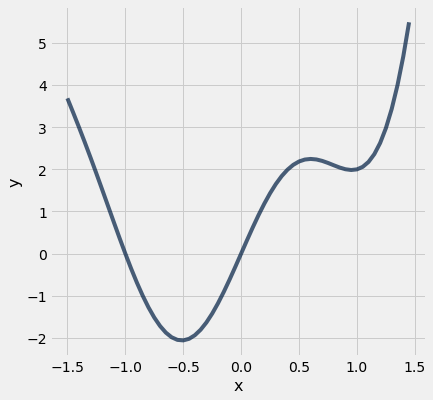

In [51]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 
Table().with_columns('x', x, 'y', y2).plot('x')

In [52]:
def complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4

What x-value gives us the smalles y-value?

In [53]:
minimize(complicated_function)

-0.5126437620940081

(back to slides)
# Minimizing MSE


In [54]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) 

In [59]:
lw_mse(1500, 20000), lw_mse(1500, 20000)

(95488325670.93617, 95488325670.93617)

In [60]:
minimize(lw_mse)

array([  86.97784117, 4744.78484535])

In [58]:
slope(little_women, "Periods", "Characters"), intercept(little_women, "Periods", "Characters")

(86.97784125829821, 4744.784796574928)

(back to slides)
# Residuals 

Let's make a new function called residuals

In [61]:
def residuals(t, x, y):
    """ Returns residual for each prediction, 
        i.e. the difference between the true y and predicted y"""
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [62]:
residuals(little_women, "Periods", "Characters")

array([  575.40320561,  1051.38104687, -4278.66612724,  3820.53615806,
       -3529.13431744, -2299.68257274, -1707.88200141,  -882.04282585,
        -289.31730062, -2327.68542936,  1492.49184057, -2695.27869638,
       -1296.90701678, -2476.79622307, -3102.77406433, -4351.973493  ,
       -4347.35019161,   162.40606223,  2068.89641117, -3104.57177903,
       -4596.82409506, -1474.12574757, -3213.31158737,  3664.24809441,
         866.23164892,  3947.53901468,  1528.63050627,  2676.22022243,
        1243.37819024,   431.04580912,   496.15945945, -1069.82123843,
         853.3560315 ,  5397.91000004,  -917.33088949, -2001.5689224 ,
        5123.69412587,  3428.77990422,  -146.95704751,  1317.56688667,
        5454.35888812,  1744.82993495,  1928.97361964, -2718.67971611,
        -536.65755737,  1996.40034898,  2094.90143017])

Let's add residuals to a table and plot the table
    <details>
<summary>Solution</summary>
  little_women_fitted.with_columns('residuals', residuals(little_women, "Periods", "Characters")).scatter('Periods')
</details>

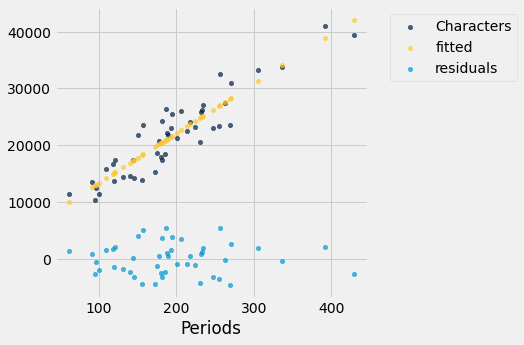

In [63]:
  little_women_fitted.with_columns('residuals', residuals(little_women, "Periods", "Characters")).scatter('Periods')

**Question:** Why are the residuals on the bottom?
        <details>
<summary>Solution</summary>
  Becuase residuals show the difference between the prediction and the true value
</details>

Let's plot the residuals and the predictions seperately

In [64]:
def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
        "Fitted", fitted_values(t, x, y),
        "Residual", residuals(t, x, y)/ 1000 # I did this division just for this example
    )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

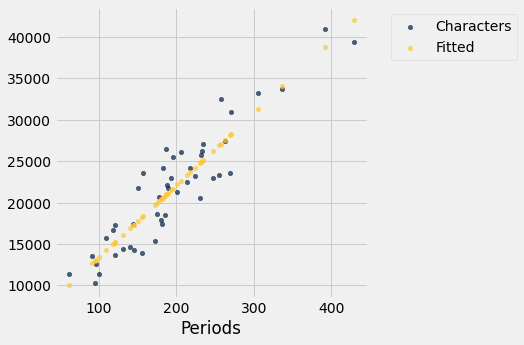

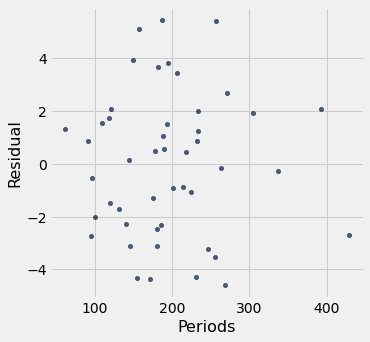

In [65]:
plot_residuals(little_women, "Periods", "Characters")

We see the residuals clustered around 0. This makes sense because the data is correlated

(back to demo)
# Nonlinear Regression

We will look at two examples


In [66]:
shotput = Table.read_table('shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


In [67]:
correlation(shotput, "Weight Lifted", "Shot Put Distance")

0.8929919094772174

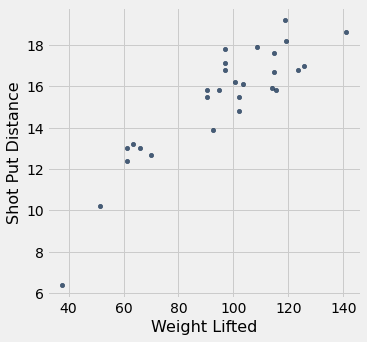

In [68]:
shotput.scatter('Weight Lifted')

**Question**: Is the association linear?

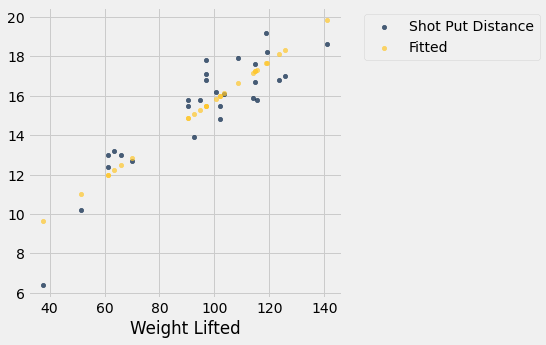

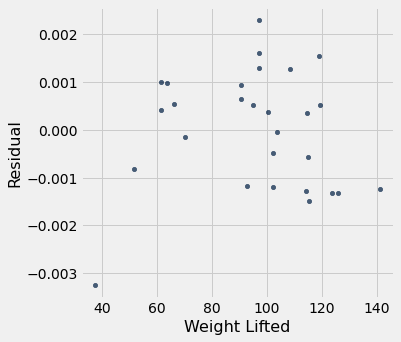

In [69]:
plot_residuals(shotput, "Weight Lifted", "Shot Put Distance")

Let's look at another example

In [70]:
height_weight = Table.read_table('us_women.csv')
height_weight

height,ave weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


**Question**: Is the association linear?

In [71]:
correlation(height_weight, 'height', 'ave weight')

0.9954947677842161

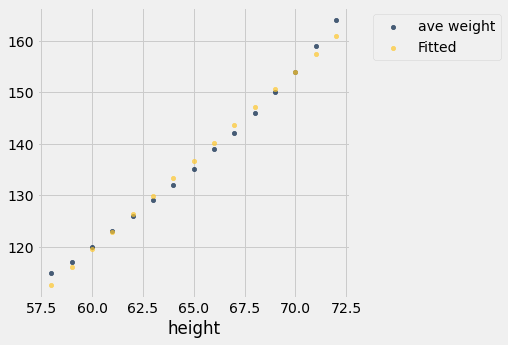

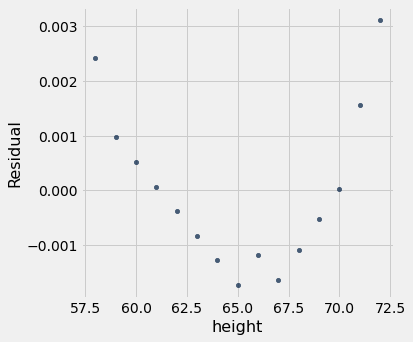

In [72]:
plot_residuals(height_weight, 'height', "ave weight")

(back to slides) 
# A Measure of cluster

In [ ]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

In [ ]:
plot_fitted(height_weight, 'height', "ave weight")

In [ ]:
weight_pred_sd = np.std(fitted_values(height_weight, 'height', 'ave weight'))
weight_observed_sd = np.std(height_weight.column('ave weight'))
print(weight_pred_sd)
print(weight_observed_sd)

In [ ]:
weight_pred_sd / weight_observed_sd

In [ ]:
correlation(height_weight, 'height', 'ave weight')